In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [37]:
df = pd.read_csv('./combined_test_results.csv', index_col=0, header=0)

In [43]:
df.columns = ['Group', 'Threshold_Percentage', 
              'True_Positive', 'False_Positive', 
              'True_Negative', 'False_Negative', 
              'True_Positive_Rate', 'True_Negative_Rate', 
              'Positive_Predictive_Value', 'Negative_Predictive_Value', 
              'False_Negative_Rate', 'False_Positive_Rate',
              'False_Discovery_Rate', 'False_Omission_Rate', 
              'Accuracy', 'F1',
              'Matthews_Correlation_Coefficient', 'AUROC',
              'AUPR_0', 'AUPR'
             ]
df

,Group,Threshold_Percentage,True_Positive,False_Positive,True_Negative,False_Negative,True_Positive_Rate,True_Negative_Rate,Positive_Predictive_Value,Negative_Predictive_Value,False_Negative_Rate,False_Positive_Rate,False_Discovery_Rate,False_Omission_Rate,Accuracy,F1,Matthews_Correlation_Coefficient,AUROC,AUPR_0,AUPR
0,error,0,304913,37440,476369,52813,0.85,0.93,0.89,0.9000,0.1500,0.07,0.11,0.10,0.90,0.44,0.79,0.95,0.965,0.933
1,converged,0,136911,27375,665535,41714,0.77,0.96,0.83,0.9400,0.2300,0.04,0.17,0.06,0.92,0.40,0.75,0.95,0.987,0.873
2,overall,0,13,117,870536,869,0.01,1.00,0.10,1.0000,0.9900,0.00,0.90,0.00,1.00,0.01,0.04,0.55,1.000,0.019
3,overall,25,1122,742,865070,4601,0.20,1.00,0.60,0.9900,0.8000,0.00,0.40,0.01,0.99,0.15,0.34,0.85,0.999,0.359
4,overall,50,3738,1513,858028,8256,0.31,1.00,0.71,0.9900,0.6900,0.00,0.29,0.01,0.99,0.22,0.47,0.91,0.999,0.531
5,overall,100,10909,3451,844127,13048,0.46,1.00,0.76,0.9800,0.5400,0.00,0.24,0.02,0.98,0.28,0.58,0.94,0.998,0.659
6,np,0,922,1409,863222,5982,0.13,1.00,0.40,0.9931,0.8665,0.00,0.60,0.01,0.99,0.10,0.23,0.79,0.998,0.206
7,np,25,7200,3627,847004,13704,0.34,1.00,0.67,0.9800,0.6600,0.00,0.33,0.02,0.98,0.23,0.47,0.91,0.998,0.526
8,np,50,13751,5111,835723,16950,0.45,0.99,0.73,0.9800,0.5500,0.01,0.27,0.02,0.97,0.28,0.56,0.93,0.997,0.616
9,np,100,22438,7113,819845,22139,0.50,0.99,0.76,0.9700,0.5000,0.01,0.24,0.03,0.97,0.30,0.60,0.94,0.996,0.682


In [44]:
labels=df.columns.values[2:]
labels

array(['True_Positive', 'False_Positive', 'True_Negative',
       'False_Negative', 'True_Positive_Rate', 'True_Negative_Rate',
       'Positive_Predictive_Value', 'Negative_Predictive_Value',
       'False_Negative_Rate', 'False_Positive_Rate',
       'False_Discovery_Rate', 'False_Omission_Rate', 'Accuracy', 'F1',
       'Matthews_Correlation_Coefficient', 'AUROC', 'AUPR_0', 'AUPR'], dtype=object)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

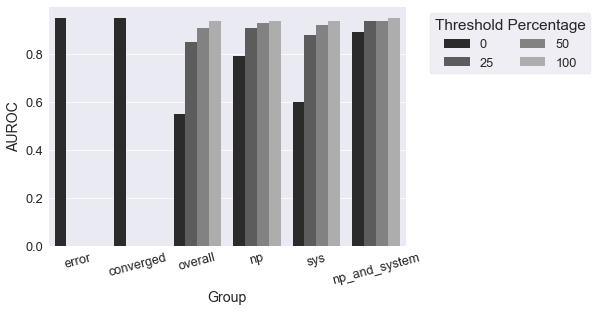

In [40]:
# Compare AUROC results for all 18 labels
#     based on their groupings
label = 'AUROC'
sns.set_context("paper", font_scale=1.6)
sns.set_palette("Greys_r")
auroc_ax = sns.barplot(x='Group', y=label, 
                       hue='Threshold_Percentage', data=df)
auroc_ax.set(ylabel=label)
auroc_ax.legend(ncol=2, bbox_to_anchor=(1.05, 1),loc=0, frameon=True, title="Threshold Percentage")
plt.xticks(rotation=15)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

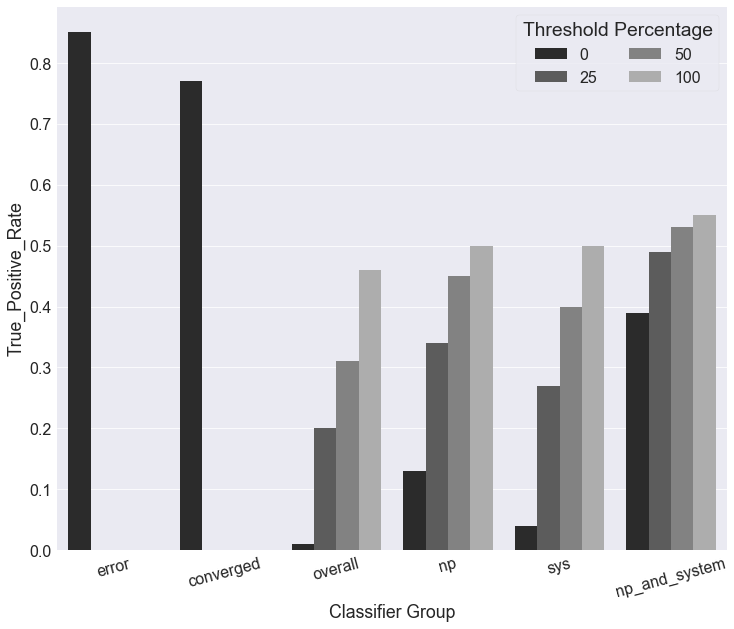

In [41]:
# Compare TPR results for all 18 labels
#     based on their groupings
label = 'True_Positive_Rate'
sns.set_context("paper", font_scale=2)
sns.set_palette("Greys_r")
plt.figure(figsize=(12,10))
auroc_ax = sns.barplot(x='Group', y=label, 
                       hue='Threshold_Percentage', data=df)
auroc_ax.set(ylabel=label)
auroc_ax.set(xlabel="Classifier Group")
auroc_ax.legend(ncol=2, loc=0, frameon=True, title="Threshold Percentage")
plt.xticks(rotation=15)

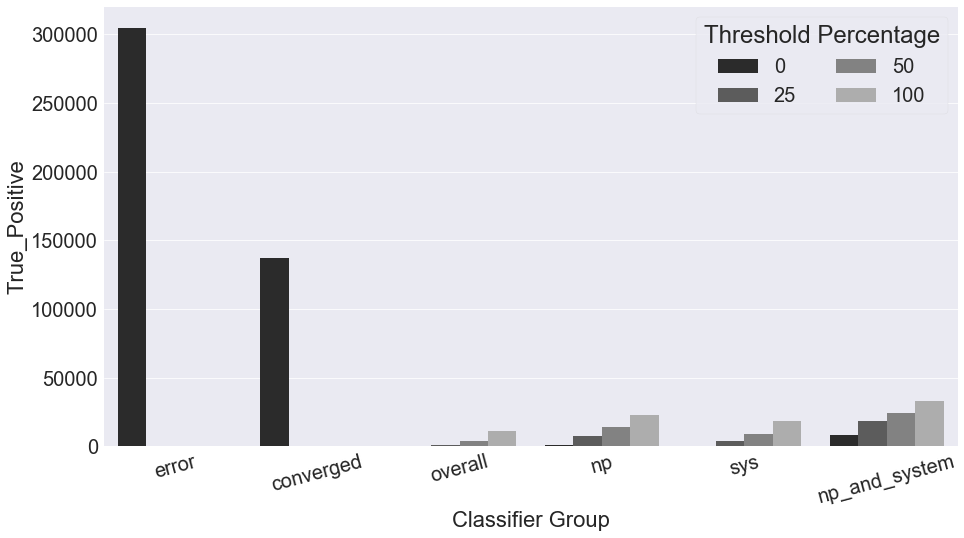

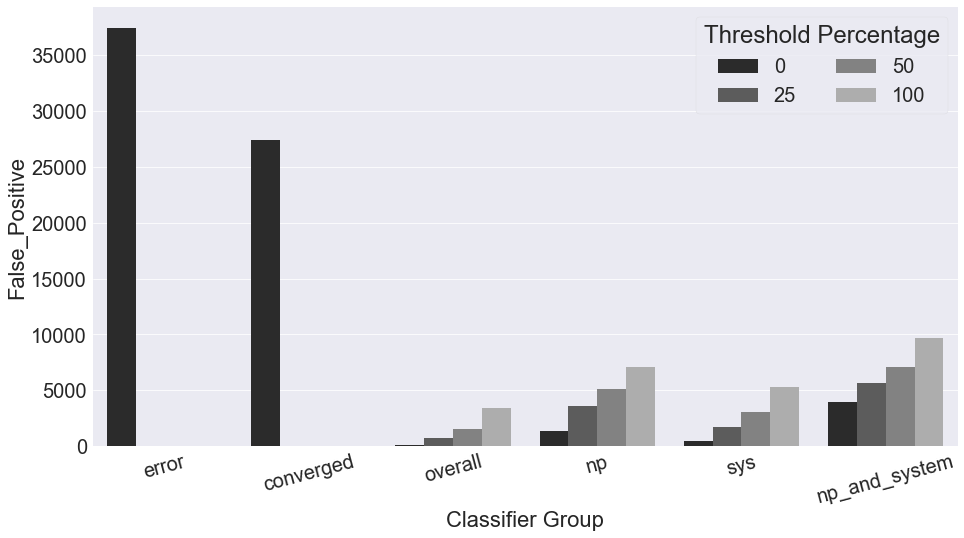

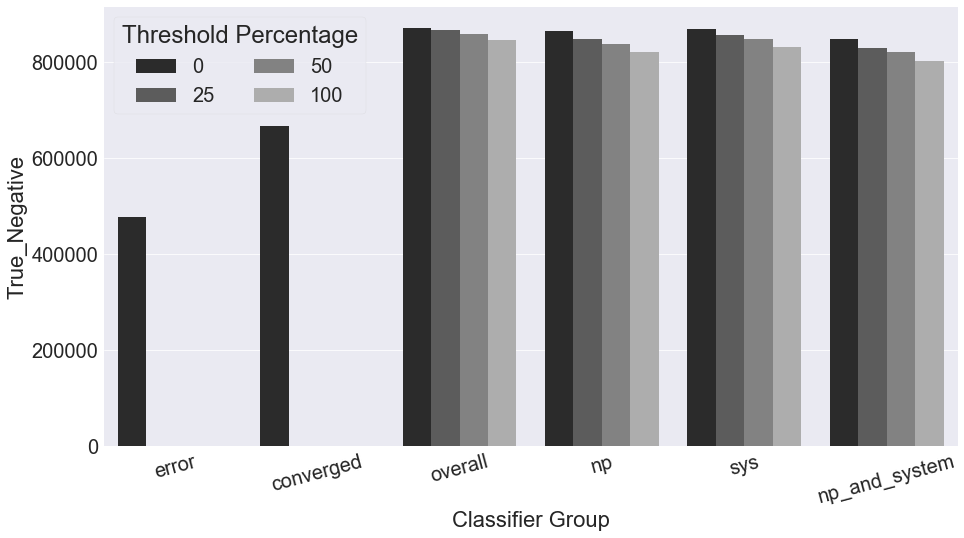

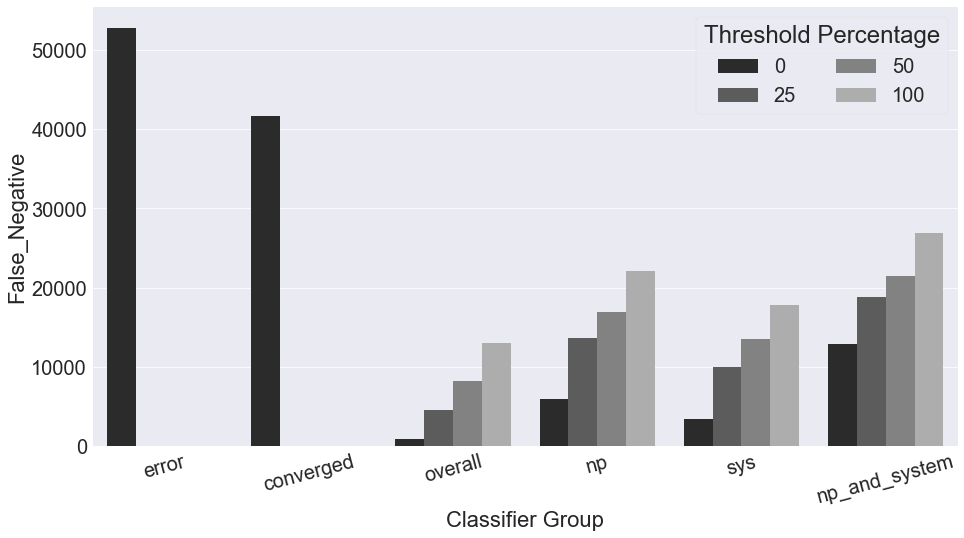

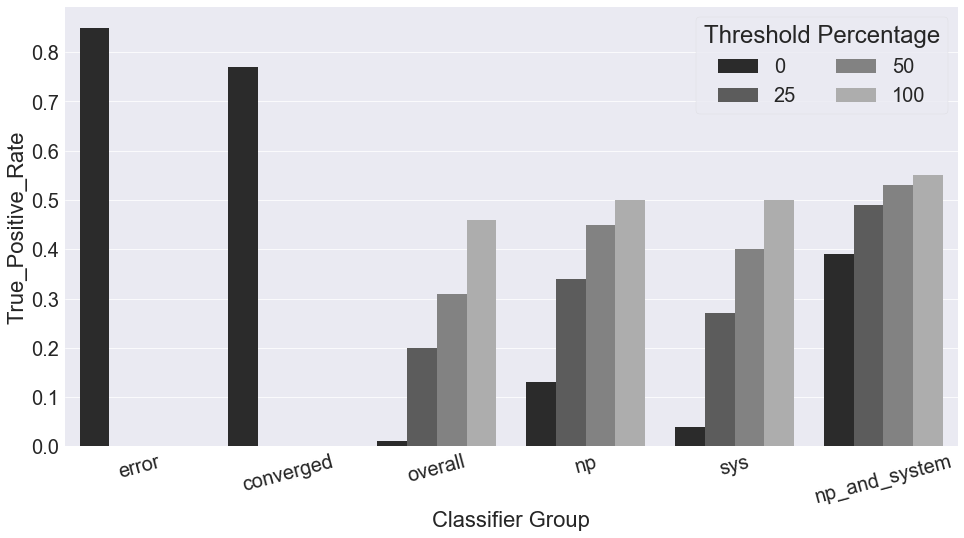

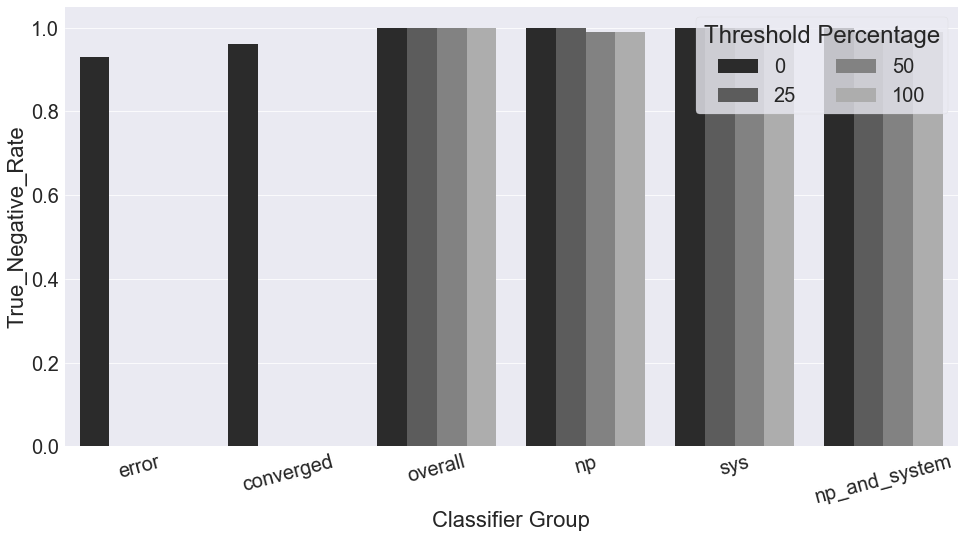

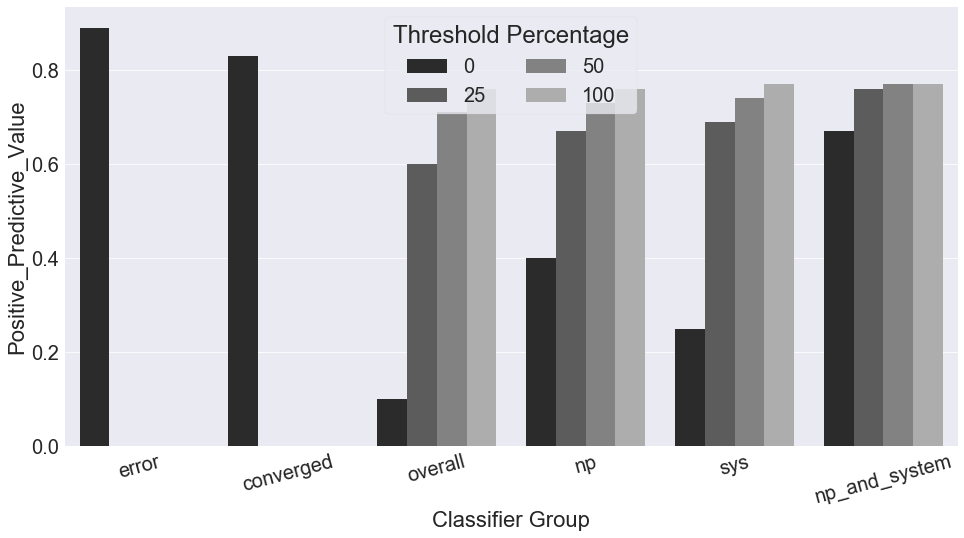

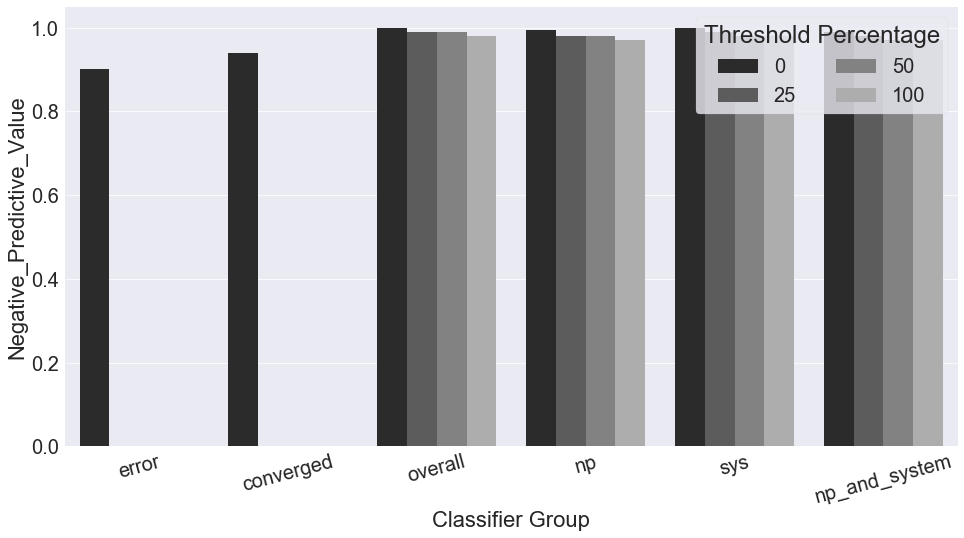

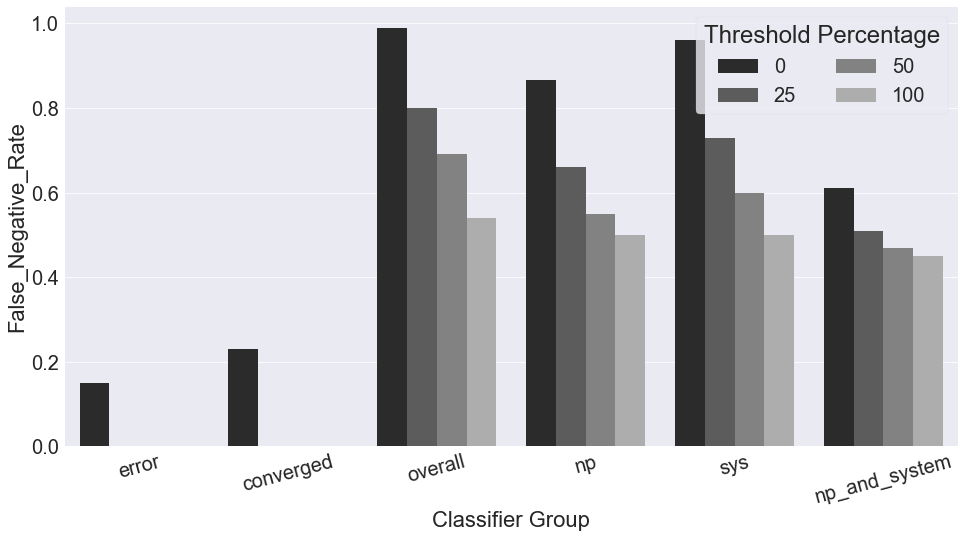

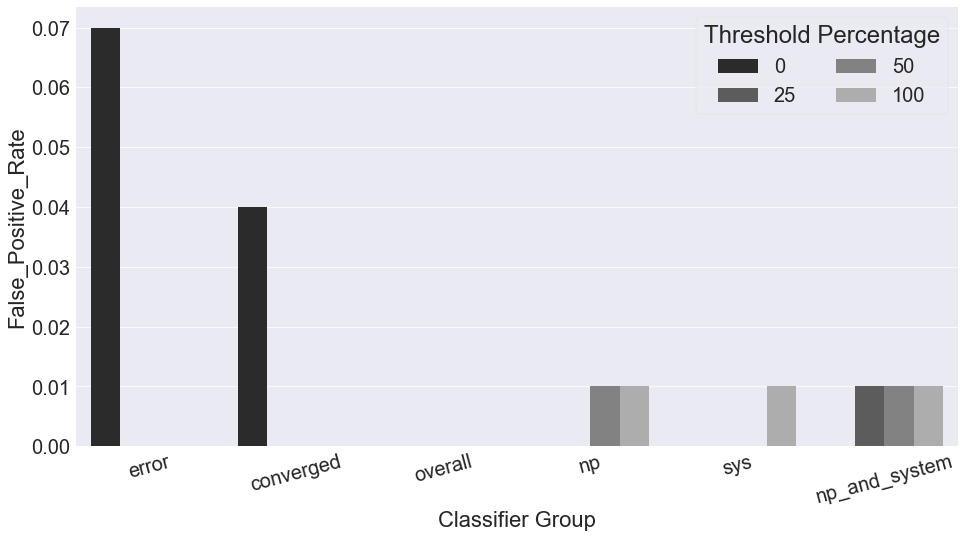

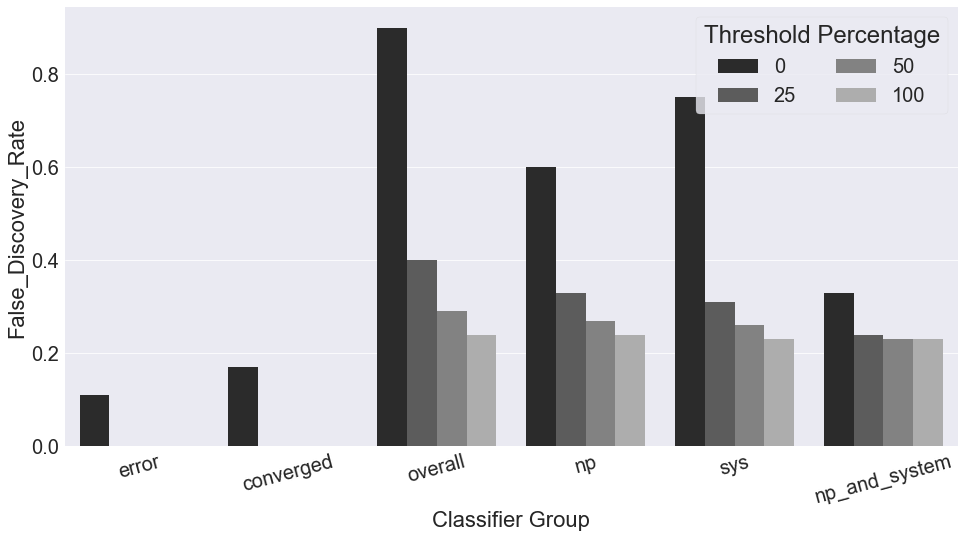

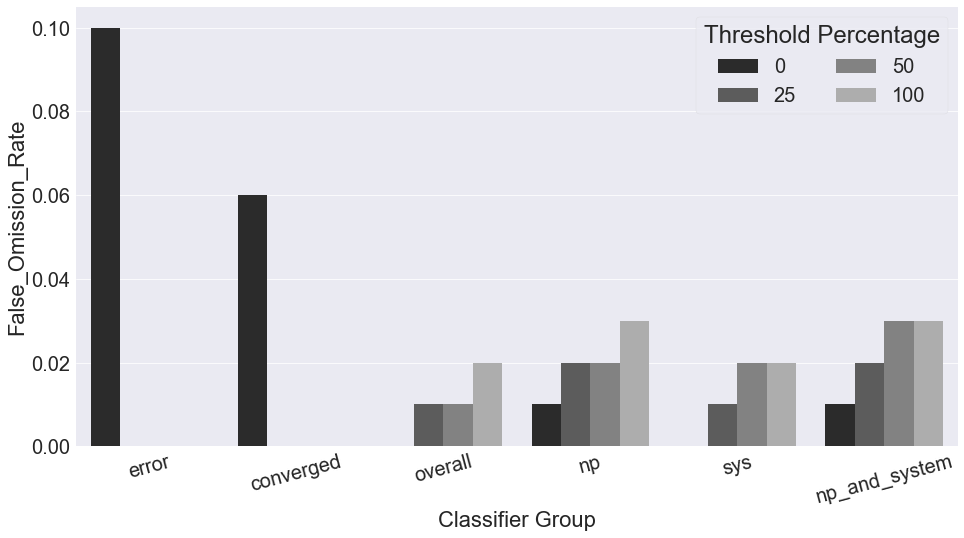

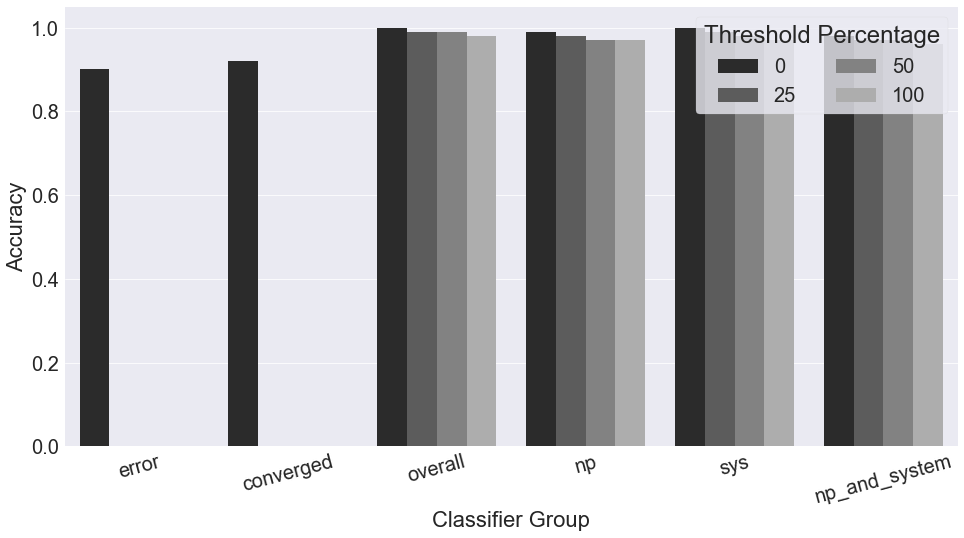

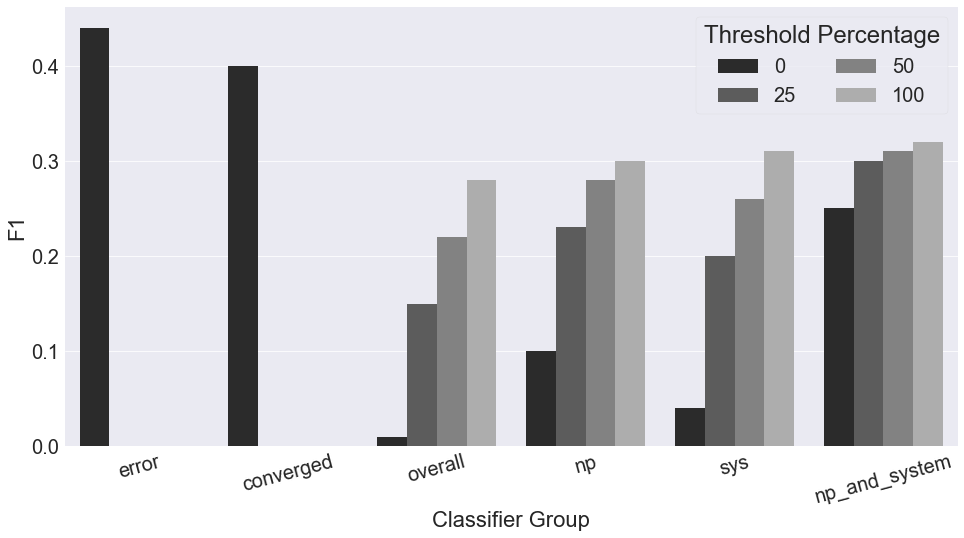

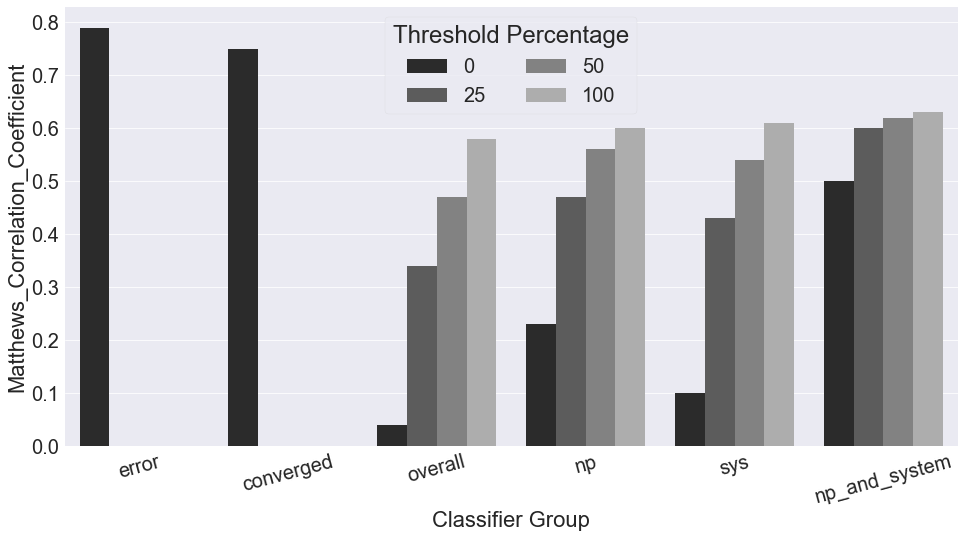

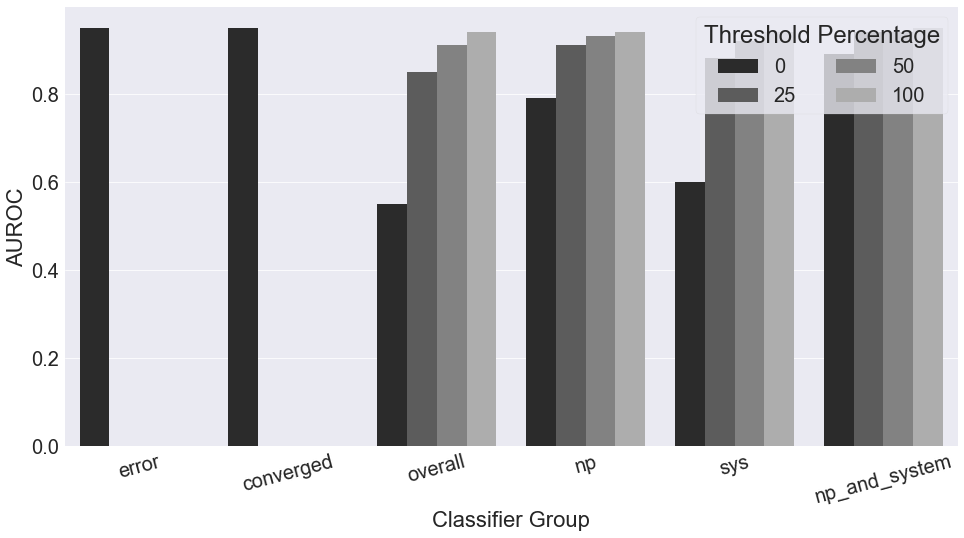

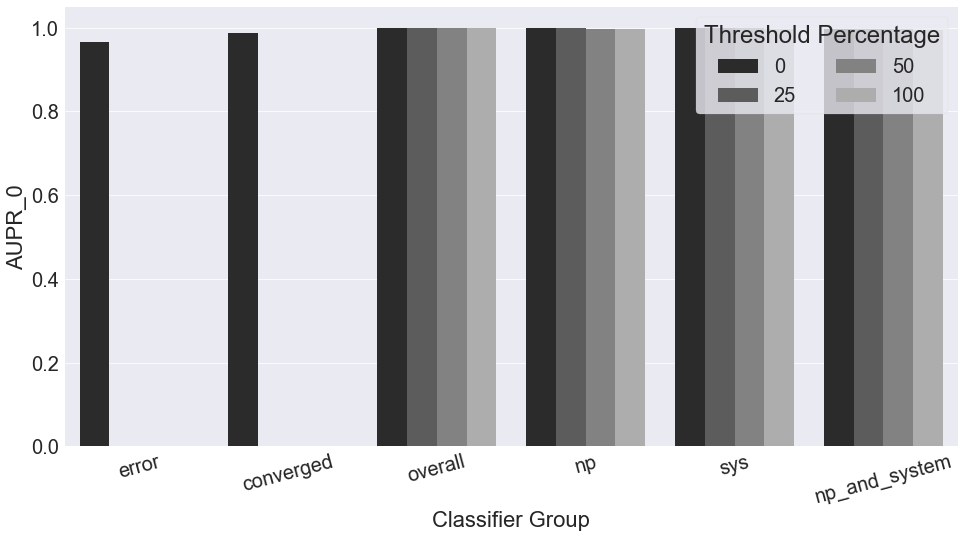

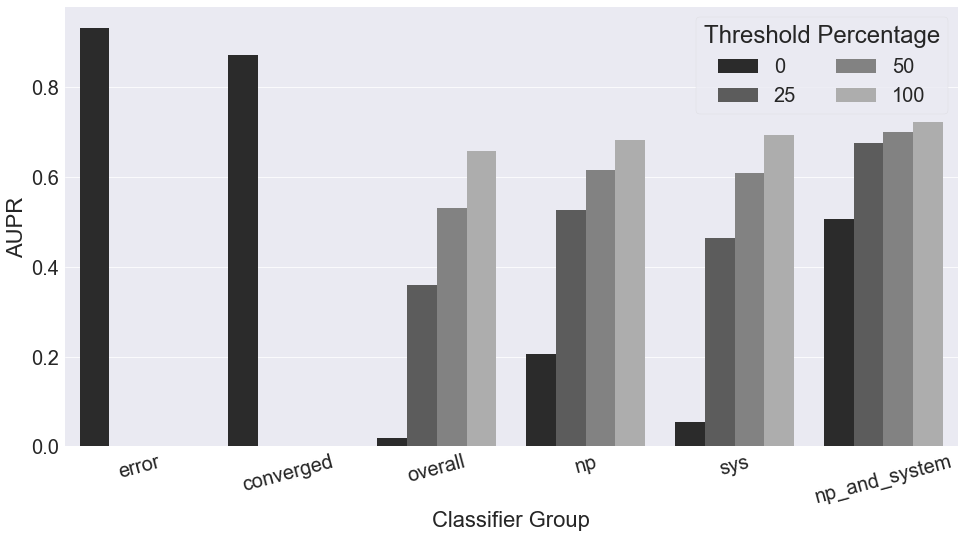

In [46]:
# Compare TPR results for all 18 labels
#     based on their groupings
for lbl in labels:
    label = lbl
    sns.set_context("paper", font_scale=2.5)
    sns.set_palette("Greys_r", 6)
    plt.figure(figsize=(14,8))
    auroc_ax = sns.barplot(x='Group', y=label, 
                           hue='Threshold_Percentage', data=df)
    auroc_ax.set(ylabel=label)
    auroc_ax.set(xlabel="Classifier Group")
    auroc_ax.legend(ncol=2, bbox_to_anchor=(1.05, 1),loc=0, frameon=True, title="Threshold Percentage")
    #lgd = auroc_ax.legend(ncol=2, bbox_to_anchor=(1.05, 1),loc=0, frameon=True, title="Threshold Percentage")
    lgd = auroc_ax.legend(ncol=2, loc=0,frameon=True, title="Threshold Percentage")
    plt.xticks(rotation=15)
    plt.tight_layout()
    
    plt.savefig(label + '.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()
    